## Laboratorio 2 - Series de Tiempo LSTM
#### Sebastian Juarez - 21471

### Analisis Exploratorio

Inicio de la serie: 2021-01-01 00:00:00
Fin de la serie: 2025-07-13 00:00:00
Frecuencia aproximada: Diaria


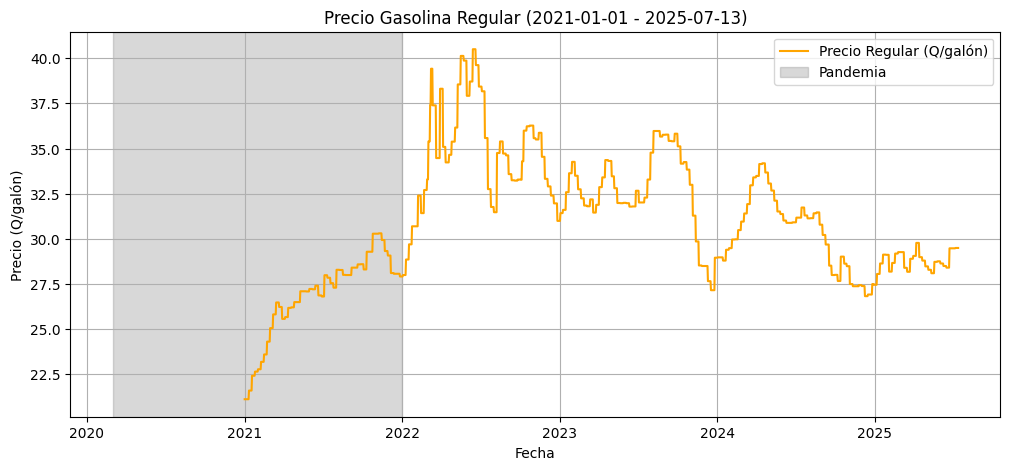

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Data/Precios-Promedio-Nacionales-Diarios-2025-1.xlsx"
precios_df = pd.read_excel(file_path)

precios_clean = precios_df[['FECHA', 'Regular']].copy()

precios_clean = precios_clean[pd.to_numeric(precios_clean['Regular'], errors='coerce').notna()]

precios_clean['FECHA'] = pd.to_datetime(precios_clean['FECHA'])
precios_clean['Regular'] = precios_clean['Regular'].astype(float)

inicio = precios_clean['FECHA'].min()
fin = precios_clean['FECHA'].max()
print(f"Inicio de la serie: {inicio}")
print(f"Fin de la serie: {fin}")
print(f"Frecuencia aproximada: Diaria")

plt.figure(figsize=(12,5))
plt.plot(precios_clean['FECHA'], precios_clean['Regular'], color='orange', label='Precio Regular (Q/galón)')
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2021-12-31"), 
            color='gray', alpha=0.3, label='Pandemia')

plt.title(f'Precio Gasolina Regular ({inicio.date()} - {fin.date()})')
plt.xlabel('Fecha')
plt.ylabel('Precio (Q/galón)')
plt.legend()
plt.grid(True)
plt.show()


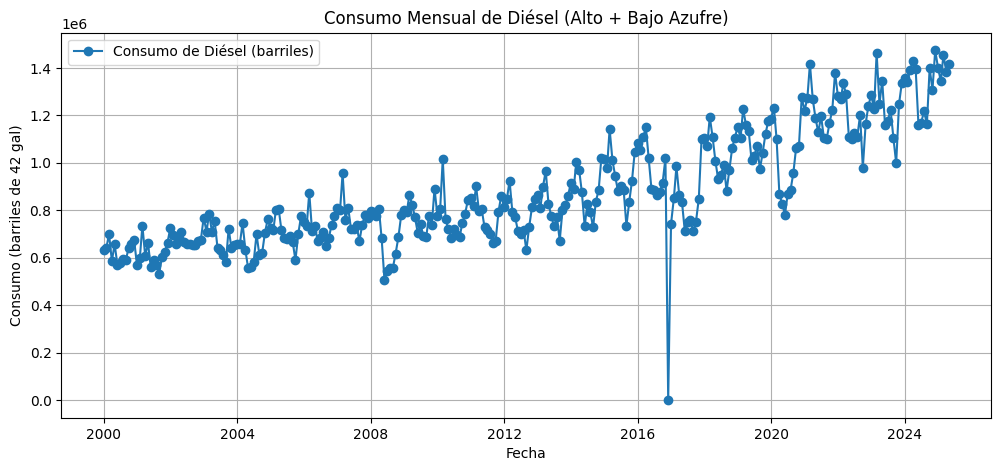

Inicio de la serie: 2000-01-01
Fin de la serie: 2025-05-01
Frecuencia: Mensual


In [2]:
consumo_2024 = pd.read_excel("Data/CONSUMO-HIDROCARBUROS-2024-12.xlsx", header=None)
consumo_2025 = pd.read_excel("Data/VENTAS-HIDROCARBUROS-2025-05.xlsx", header=None)

fila_header_2024 = consumo_2024[0].astype(str).str.contains("Fecha", case=False, na=False)
fila_header_2025 = consumo_2025[0].astype(str).str.contains("Fecha", case=False, na=False)

header_index_2024 = consumo_2024[fila_header_2024].index[0]
header_index_2025 = consumo_2025[fila_header_2025].index[0]

consumo_2024 = pd.read_excel("Data/CONSUMO-HIDROCARBUROS-2024-12.xlsx", header=header_index_2024)
consumo_2025 = pd.read_excel("Data/VENTAS-HIDROCARBUROS-2025-05.xlsx", header=header_index_2025)

consumo_2024 = consumo_2024[pd.to_datetime(consumo_2024['Fecha'], errors='coerce').notna()].copy()

consumo_2024['Fecha'] = pd.to_datetime(consumo_2024['Fecha'])

consumo_2024['Diesel_Total'] = consumo_2024.apply(
    lambda row: row['Diesel alto azufre'] if row['Fecha'] < pd.Timestamp('2016-12-01') else row['Diesel bajo azufre'],
    axis=1
)

consumo_2025 = consumo_2025[['Fecha', 'Diesel bajo azufre']].dropna()
consumo_2025['Fecha'] = pd.to_datetime(consumo_2025['Fecha'])
consumo_2025.rename(columns={'Diesel bajo azufre': 'Diesel_Total'}, inplace=True)

consumo_diesel = pd.concat([
    consumo_2024[['Fecha', 'Diesel_Total']],
    consumo_2025[['Fecha', 'Diesel_Total']]
])
consumo_diesel = consumo_diesel.sort_values(by='Fecha').reset_index(drop=True)

# --- GRAFICAR ---
plt.figure(figsize=(12,5))
plt.plot(consumo_diesel['Fecha'], consumo_diesel['Diesel_Total'], marker='o', label='Consumo de Diésel (barriles)')
plt.title('Consumo Mensual de Diésel (Alto + Bajo Azufre)')
plt.xlabel('Fecha')
plt.ylabel('Consumo (barriles de 42 gal)')
plt.legend()
plt.grid(True)
plt.show()

# --- INFORMACIÓN BÁSICA ---
print(f"Inicio de la serie: {consumo_diesel['Fecha'].min().date()}")
print(f"Fin de la serie: {consumo_diesel['Fecha'].max().date()}")
print(f"Frecuencia: Mensual")


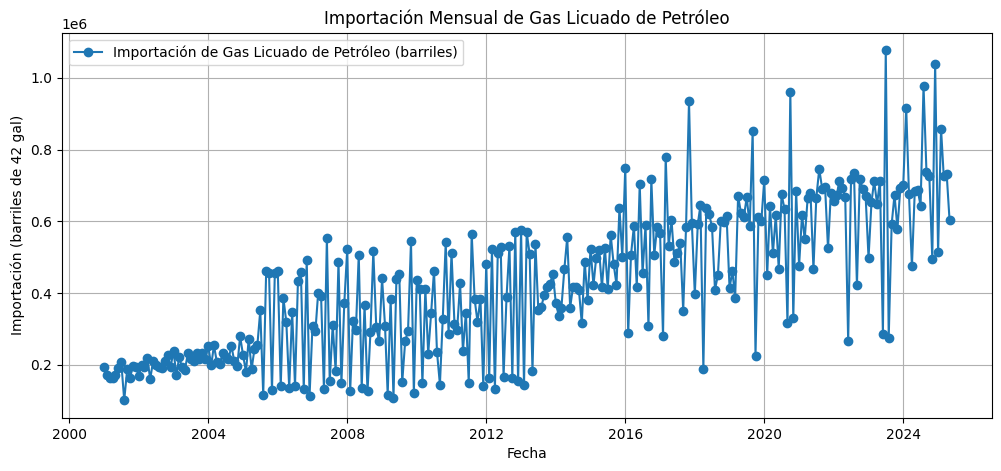

Inicio de la serie: 2001-01-01
Fin de la serie: 2025-05-01
Frecuencia: Mensual


In [3]:
importacion_2024 = pd.read_excel("Data/IMPORTACION-HIDROCARBUROS-VOLUMEN-2024-12.xlsx", header=None)
importacion_2025 = pd.read_excel("Data/IMPORTACION-HIDROCARBUROS-VOLUMEN-2025-05.xlsx", header=None)

fila_header_2024 = importacion_2024[0].astype(str).str.contains("Fecha", case=False, na=False)
fila_header_2025 = importacion_2025[0].astype(str).str.contains("Fecha", case=False, na=False)

header_index_2024 = importacion_2024[fila_header_2024].index[0]
header_index_2025 = importacion_2025[fila_header_2025].index[0]

importacion_2024 = pd.read_excel("Data/IMPORTACION-HIDROCARBUROS-VOLUMEN-2024-12.xlsx", header=header_index_2024)
importacion_2025 = pd.read_excel("Data/IMPORTACION-HIDROCARBUROS-VOLUMEN-2025-05.xlsx", header=header_index_2025)

importacion_2024.columns = [col.strip().lower() for col in importacion_2024.columns]
importacion_2025.columns = [col.strip().lower() for col in importacion_2025.columns]

importacion_2024 = importacion_2024[['fecha', 'gas licuado de petróleo']].dropna()
importacion_2025 = importacion_2025[['fecha', 'gas licuado de petróleo']].dropna()

importacion_2024['fecha'] = pd.to_datetime(importacion_2024['fecha'])
importacion_2025['fecha'] = pd.to_datetime(importacion_2025['fecha'])

importacion_gas = pd.concat([importacion_2024, importacion_2025])
importacion_gas = importacion_gas.sort_values(by='fecha').reset_index(drop=True)

plt.figure(figsize=(12,5))
plt.plot(importacion_gas['fecha'], importacion_gas['gas licuado de petróleo'], marker='o', label='Importación de Gas Licuado de Petróleo (barriles)')
plt.title('Importación Mensual de Gas Licuado de Petróleo')
plt.xlabel('Fecha')
plt.ylabel('Importación (barriles de 42 gal)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Inicio de la serie: {importacion_gas['fecha'].min().date()}")
print(f"Fin de la serie: {importacion_gas['fecha'].max().date()}")
print(f"Frecuencia: Mensual")


<Figure size 1200x800 with 0 Axes>

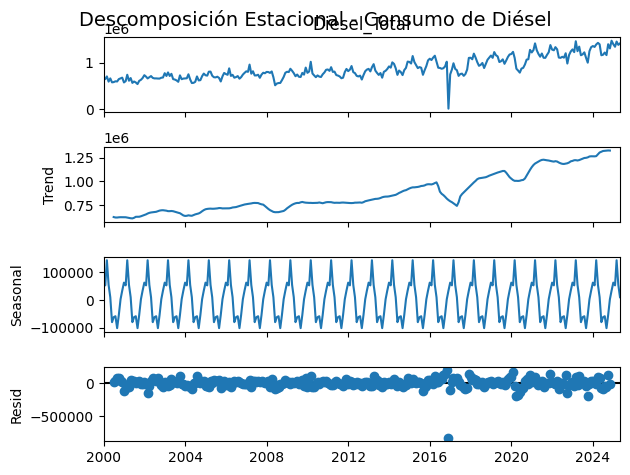

<Figure size 1200x800 with 0 Axes>

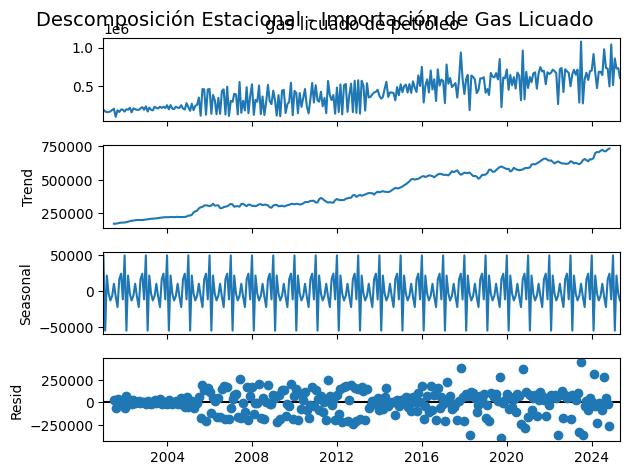

<Figure size 1200x800 with 0 Axes>

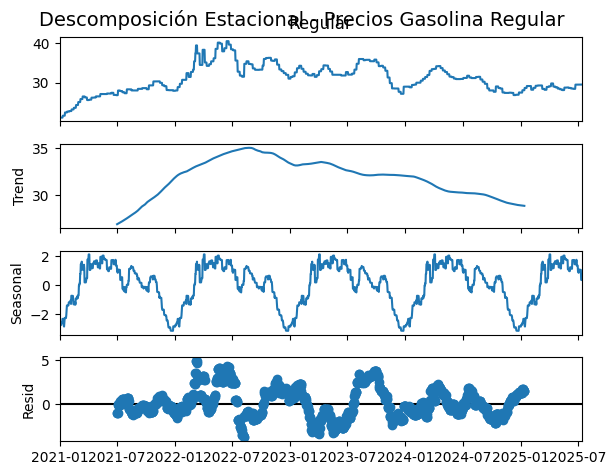

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = "Data/Precios-Promedio-Nacionales-Diarios-2025-1.xlsx"
precios_df = pd.read_excel(file_path)
precios_clean = precios_df[['FECHA', 'Regular']].copy()
precios_clean = precios_clean[pd.to_numeric(precios_clean['Regular'], errors='coerce').notna()]
precios_clean['FECHA'] = pd.to_datetime(precios_clean['FECHA'])
precios_clean['Regular'] = precios_clean['Regular'].astype(float)

# --- FUNCIÓN AUXILIAR ---
def plot_seasonality(df, date_col, value_col, freq, title):
    """
    Descompone una serie de tiempo y grafica tendencia, estacionalidad y residuo.
    df: DataFrame con columnas [date_col, value_col]
    freq: frecuencia (ej. 'M' mensual, 'D' diaria)
    """
    series = df.set_index(date_col)[value_col]
    # Crear un índice completo según la frecuencia
    if freq == 'M':
        full_idx = pd.date_range(series.index.min(), series.index.max(), freq='MS')
        period = 12
    elif freq == 'D':
        full_idx = pd.date_range(series.index.min(), series.index.max(), freq='D')
        period = 365
    else:
        raise ValueError("Frecuencia no soportada")
    series = series.reindex(full_idx)
    series = series.ffill().bfill()
    decomposition = seasonal_decompose(series, model='additive', period=period)

    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.suptitle(title, fontsize=14)
    plt.show()

# ESTACIONALIDAD: CONSUMO DE DIÉSEL
plot_seasonality(consumo_diesel, 'Fecha', 'Diesel_Total', freq='M',
                 title='Descomposición Estacional - Consumo de Diésel')
# ESTACIONALIDAD: IMPORTACIÓN DE GAS LICUADO
plot_seasonality(importacion_gas, 'fecha', 'gas licuado de petróleo', freq='M',
                 title='Descomposición Estacional - Importación de Gas Licuado')

# ESTACIONALIDAD: PRECIOS DE GASOLINA REGULAR
plot_seasonality(precios_clean, 'FECHA', 'Regular', freq='D',
                 title='Descomposición Estacional - Precios Gasolina Regular')


## Modelos de series de Tiempo con LSTM

### Preparación

In [5]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# PREPARACION DE LOS DATOS
data = precios_clean[['FECHA', 'Regular']].copy()
data = data.set_index('FECHA')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(dataset, look_back=60):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

look_back = 60
X, y = create_sequences(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Datos de entrenamiento y prueba
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


### Modelo 1 - LSTM simple

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1323 - val_loss: 0.0069
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019 - val_loss: 7.4380e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0022 - val_loss: 8.2537e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0019 - val_loss: 5.8899e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0017 - val_loss: 6.0969e-04
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0017 - val_loss: 5.0645e-04
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0016 - val_loss: 4.5979e-04
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0018 - val_loss: 5.2867e-04
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014 - val_loss: 8.5934e-04
Epoch 12/20
40/40 ━━━━━━━━━━━━━

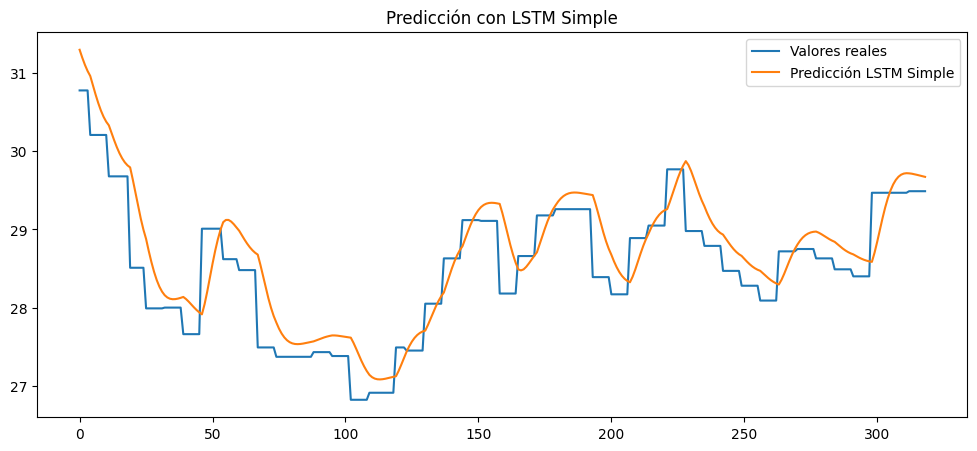

In [6]:
# LSTM SIMPLE
model_simple = Sequential()
model_simple.add(LSTM(50, return_sequences=False, input_shape=(look_back, 1)))
model_simple.add(Dense(1))

model_simple.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history_simple = model_simple.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predicciones
pred_simple = model_simple.predict(X_test)
pred_simple = scaler.inverse_transform(pred_simple)
real_values = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12,5))
plt.plot(real_values, label='Valores reales')
plt.plot(pred_simple, label='Predicción LSTM Simple')
plt.legend()
plt.title('Predicción con LSTM Simple')
plt.show()


### Modelo 2 - LSTM con capas y dropout

Epoch 1/30


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0884 - val_loss: 0.0020
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0026 - val_loss: 5.9615e-04
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0023 - val_loss: 5.5736e-04
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0023 - val_loss: 5.2531e-04
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0024 - val_loss: 6.0235e-04
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0019 - val_loss: 5.6736e-04
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - val_loss: 4.6327e-04
Epoch 9/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0021 - val_loss: 4.4643e-04
Epoch 10/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0019 - val_loss: 4.1751e-04
Epoch 11/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - val_loss: 4.5276e-04
Epoch 12/30
40/40 ━━━━━━━━━━━━━━━━━━━━

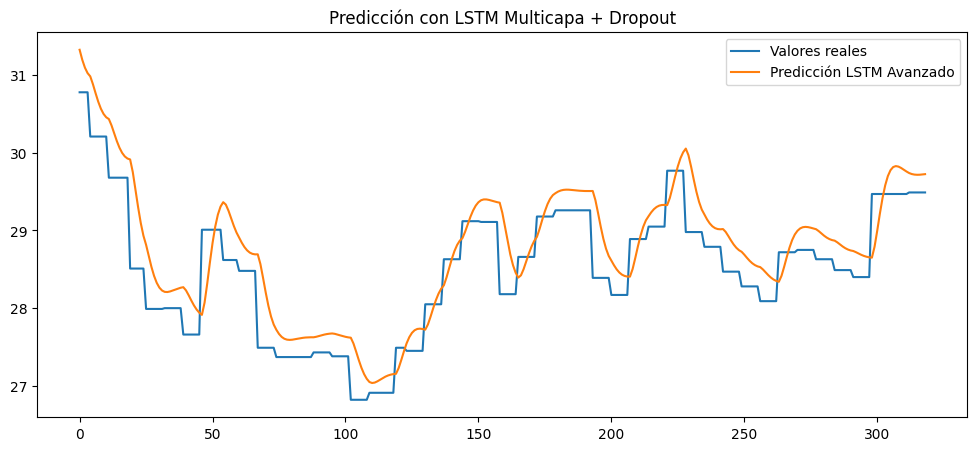

In [7]:
# LSTM MULTICAPA y DROPOUT
model_advanced = Sequential()
model_advanced.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model_advanced.add(Dropout(0.2))
model_advanced.add(LSTM(50, return_sequences=False))
model_advanced.add(Dense(1))

model_advanced.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history_advanced = model_advanced.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predicciones
pred_advanced = model_advanced.predict(X_test)
pred_advanced = scaler.inverse_transform(pred_advanced)

plt.figure(figsize=(12,5))
plt.plot(real_values, label='Valores reales')
plt.plot(pred_advanced, label='Predicción LSTM Avanzado')
plt.legend()
plt.title('Predicción con LSTM Multicapa + Dropout')
plt.show()


## Prueba de Hiperparametros

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import math

data = precios_clean[['FECHA', 'Regular']].copy()
data = data.set_index('FECHA')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(dataset, look_back=60):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

def prepare_data(look_back):
    X, y = create_sequences(scaled_data, look_back)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    split = int(len(X) * 0.8)
    return X[:split], X[split:], y[:split], y[split:]

look_back_values = [30, 60]
units_values = [32, 50]
learning_rates = [0.001, 0.005]

results = []

for lb in look_back_values:
    X_train, X_test, y_train, y_test = prepare_data(lb)
    
    for units in units_values:
        for lr in learning_rates:
            print(f"Entrenando modelo LSTM con look_back={lb}, units={units}, lr={lr}...")
            
            model = Sequential()
            model.add(LSTM(units, return_sequences=False, input_shape=(lb, 1)))
            model.add(Dense(1))
            
            model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
            model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_test, y_test))
            
            preds = model.predict(X_test, verbose=0)
            rmse = math.sqrt(mean_squared_error(y_test, preds))
            results.append((lb, units, lr, rmse))

results_df = pd.DataFrame(results, columns=['look_back', 'units', 'learning_rate', 'RMSE'])
results_df = results_df.sort_values(by='RMSE')
print(results_df)


Entrenando modelo LSTM con look_back=30, units=32, lr=0.001...


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenando modelo LSTM con look_back=30, units=32, lr=0.005...


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenando modelo LSTM con look_back=30, units=50, lr=0.001...


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenando modelo LSTM con look_back=30, units=50, lr=0.005...


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenando modelo LSTM con look_back=60, units=32, lr=0.001...


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenando modelo LSTM con look_back=60, units=32, lr=0.005...


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenando modelo LSTM con look_back=60, units=50, lr=0.001...


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenando modelo LSTM con look_back=60, units=50, lr=0.005...


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


   look_back  units  learning_rate      RMSE
5         60     32          0.005  0.016326
3         30     50          0.005  0.017353
7         60     50          0.005  0.018335
6         60     50          0.001  0.019528
0         30     32          0.001  0.021611
4         60     32          0.001  0.022113
2         30     50          0.001  0.024390
1         30     32          0.005  0.024541


Aqui se puede observar mas claramente como es que el look_back de 60 fue uno de los mejores hiperparametros que se econtraron. Se pueden usar las combinaciones para mejorar el aprendizaje y su error no varia tanto.

## Comparacion con modelos anteriores

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packag

Epoch 1/20


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - val_loss: 0.0023
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015 - val_loss: 5.4117e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 3.2525e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 3.4844e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.1367e-04 - val_loss: 2.5469e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.2082e-04 - val_loss: 2.3457e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.1734e-04 - val_loss: 2.3566e-04
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.8455e-04 - val_loss: 2.3161e-04
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.1032e-04 - val_loss: 2.7456e-04
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.7631e-04 - val_loss: 2.1239e-04
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.0776e-04 - val_loss: 4.2931e-04
Epoch 

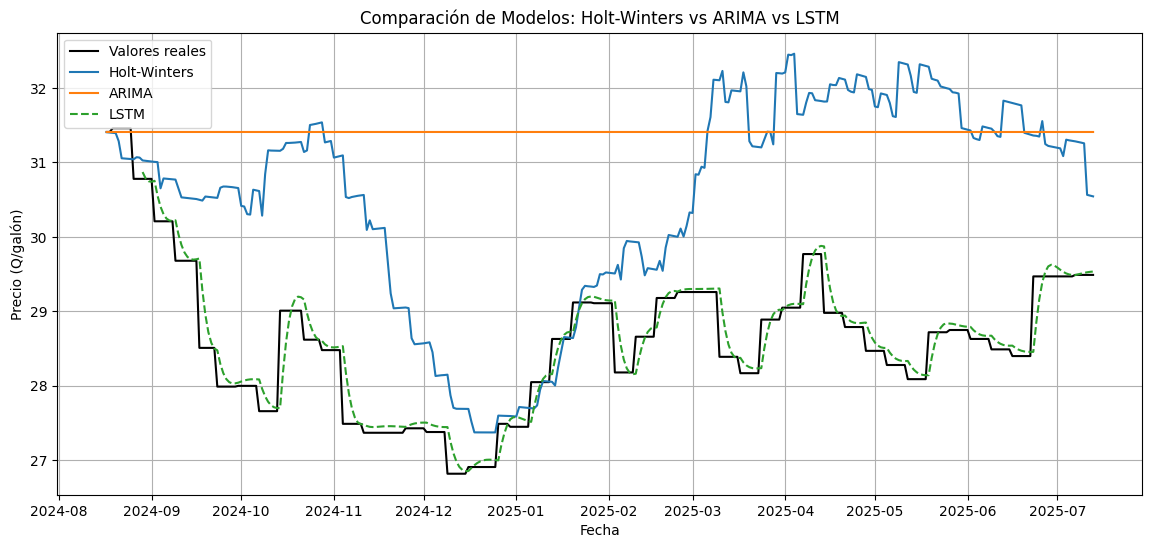

In [ ]:
data = precios_clean[['FECHA', 'Regular']].copy()
data = data.set_index('FECHA')
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# MODELO HOLT-WINTERS
holt_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365).fit()
holt_forecast = holt_model.forecast(len(test))

# MODELO ARIMA
arima_model = ARIMA(train, order=(5,1,2)).fit()
arima_forecast = arima_model.forecast(len(test))

# MODELO LSTM (con mejores hiperparámetros)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

look_back = 60 
def create_sequences(dataset, look_back=60):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))
split = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

model_lstm = Sequential()
model_lstm.add(LSTM(32, return_sequences=False, input_shape=(look_back, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))

pred_lstm = model_lstm.predict(X_test)
pred_lstm = scaler.inverse_transform(pred_lstm)
real_values = y_test.reshape(-1, 1) 
real_values = scaler.inverse_transform(real_values)

def calc_metrics(real, pred, name):
    mse = mean_squared_error(real, pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(real, pred)
    print(f"{name} -> RMSE: {rmse:.4f}, MAE: {mae:.4f}")

calc_metrics(test.values, holt_forecast.values, "Holt-Winters")
calc_metrics(test.values, arima_forecast.values, "ARIMA")
calc_metrics(real_values, pred_lstm, "LSTM")

plt.figure(figsize=(14,6))
plt.plot(test.index, test.values, label="Valores reales", color='black')
plt.plot(test.index, holt_forecast, label="Holt-Winters")
plt.plot(test.index, arima_forecast, label="ARIMA")
plt.plot(test.index[-len(pred_lstm):], pred_lstm, label="LSTM", linestyle='--')
plt.title('Comparación de Modelos: Holt-Winters vs ARIMA vs LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio (Q/galón)')
plt.legend()
plt.grid(True)
plt.show()


La comparacion de los algoritmos nos muestra que el modelo de LSTM supera bastante los otros metodos como lo son el Holt-Winters y Arima al ver la presicion de la prediccion en la gasolina regular. Vemos que el aunque si se logra ver la tendencia en Holt-winters, este no tiene una buena capacidad para adaptarse a los cambios rapidos. Arima por otro lado tiende a generar predicciones mas lineales y no se puede ver la estacionalidad o los picos de la serie y esto nos dice que tiene muchos errores. Por ultimo LSTM si aprovecha todas sus funciones neuronales para ver los patrones no lineales y las dependencias temporales haciendo que tenga unos valores de RMSE y MAE mucho mas bajos que los demas.

In [51]:
def comparar_modelos_serie(df, fecha_col, valor_col, freq='MS', look_back=60, epochs=30):
    # Convertir a numérico e interpolar valores faltantes
    df[valor_col] = pd.to_numeric(df[valor_col], errors='coerce')
    if df[valor_col].isna().sum() > 0:
        df[valor_col] = df[valor_col].interpolate()

    # Preparación de datos
    data = df[[fecha_col, valor_col]].copy()
    data[fecha_col] = pd.to_datetime(data[fecha_col])
    data = data.set_index(fecha_col).asfreq('MS')
    data = data.ffill()

    # Definir estacionalidad para Holt-Winters
    n_datos = len(data)
    seasonal_periods = 12 if n_datos >= 24 else max(1, n_datos // 2)

    # Dividir train/test
    train_size = int(len(data) * 0.8)
    train, test = data.iloc[:train_size], data.iloc[train_size:]
    train_series = train[valor_col]
    test_series = test[valor_col]

    # Holt-Winters
    try:
        if len(train) < 24:
            hw_model = ExponentialSmoothing(train_series, trend=None, seasonal=None).fit()
        else:
            hw_model = ExponentialSmoothing(
                train_series, seasonal='add', trend='add', seasonal_periods=seasonal_periods
            ).fit()
        hw_forecast = hw_model.forecast(len(test_series))
    except Exception:
        hw_forecast = pd.Series([np.nan]*len(test_series), index=test_series.index)

    # ARIMA
    try:
        arima_model = ARIMA(train_series, order=(2,1,2)).fit()
        arima_forecast = arima_model.forecast(len(test_series))
    except Exception:
        arima_forecast = pd.Series([np.nan]*len(test_series), index=test_series.index)

    # LSTM
    try:
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(data)

        def create_sequences(dataset, look_back):
            X, y = [], []
            for i in range(look_back, len(dataset)):
                X.append(dataset[i-look_back:i, 0])
                y.append(dataset[i, 0])
            return np.array(X), np.array(y)

        X, y = create_sequences(scaled_data, look_back)
        X = X.reshape((X.shape[0], X.shape[1], 1))
        split = int(len(X) * 0.8)
        X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

        lstm_model = Sequential()
        lstm_model.add(LSTM(32, return_sequences=False, input_shape=(look_back, 1)))
        lstm_model.add(Dense(1))
        lstm_model.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error')
        lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=16, verbose=0)

        pred_lstm = lstm_model.predict(X_test)
        pred_lstm = scaler.inverse_transform(pred_lstm)
        real_values = scaler.inverse_transform(y_test.reshape(-1, 1))
    except Exception:
        pred_lstm = np.array([])
        real_values = np.array([])

    # Métricas
    def calc_metrics(real, pred, name):
        mse = mean_squared_error(real, pred)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(real, pred)
        print(f"{name} -> RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    if len(hw_forecast) > 0:
        calc_metrics(test_series.values, hw_forecast.values, "Holt-Winters")
    if len(arima_forecast) > 0:
        calc_metrics(test_series.values, arima_forecast.values, "ARIMA")
    if len(pred_lstm) > 0:
        calc_metrics(real_values, pred_lstm, "LSTM")

    # Gráfica
    plt.figure(figsize=(14,6))
    plt.plot(test_series.index, test_series.values, label="Valores reales", color='black')
    if len(hw_forecast) > 0:
        plt.plot(test_series.index, hw_forecast, label="Holt-Winters")
    if len(arima_forecast) > 0:
        plt.plot(test_series.index, arima_forecast, label="ARIMA")
    if len(pred_lstm) > 0:
        plt.plot(test_series.index[-len(pred_lstm):], pred_lstm, label="LSTM", linestyle='--')
    plt.title(f'Comparación de Modelos para {valor_col}')
    plt.xlabel('Fecha')
    plt.ylabel(valor_col)
    plt.legend()
    plt.grid(True)
    plt.show()

    return hw_forecast, arima_forecast, pred_lstm


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundat

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Holt-Winters -> RMSE: 174175.0668, MAE: 128040.5670
ARIMA -> RMSE: 181759.9612, MAE: 146501.0581
LSTM -> RMSE: 159706.1570, MAE: 126533.8785


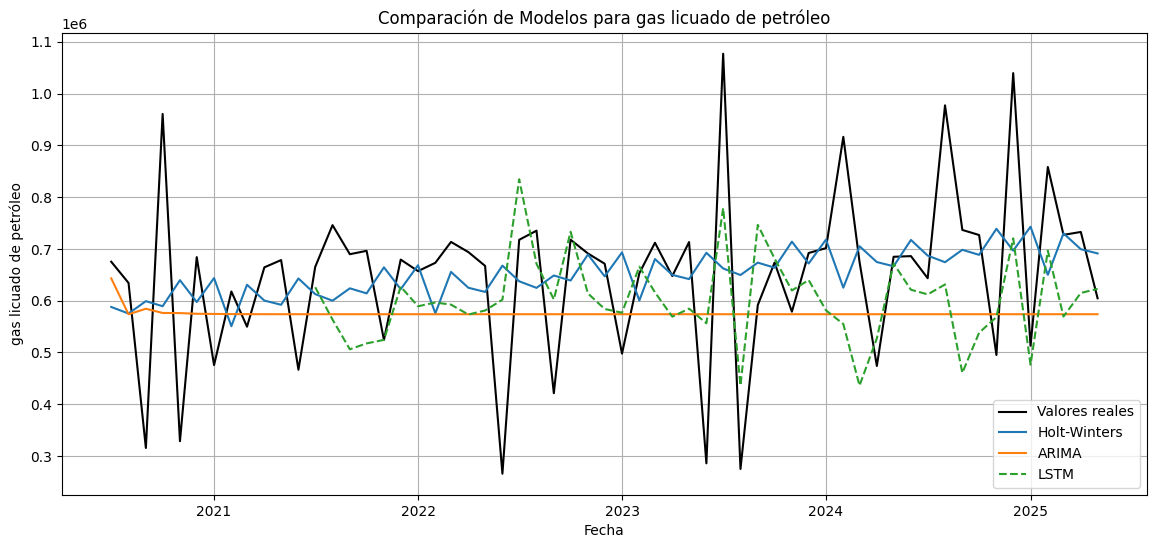

(2020-07-01    587914.431551
 2020-08-01    575197.159901
 2020-09-01    599150.810526
 2020-10-01    589366.900795
 2020-11-01    639652.102778
 2020-12-01    597448.434655
 2021-01-01    643717.510316
 2021-02-01    550779.944867
 2021-03-01    630836.182678
 2021-04-01    600267.699738
 2021-05-01    592151.230644
 2021-06-01    642976.566235
 2021-07-01    612715.952685
 2021-08-01    599998.681035
 2021-09-01    623952.331660
 2021-10-01    614168.421929
 2021-11-01    664453.623912
 2021-12-01    622249.955789
 2022-01-01    668519.031450
 2022-02-01    575581.466001
 2022-03-01    655637.703811
 2022-04-01    625069.220871
 2022-05-01    616952.751778
 2022-06-01    667778.087368
 2022-07-01    637517.473818
 2022-08-01    624800.202169
 2022-09-01    648753.852793
 2022-10-01    638969.943062
 2022-11-01    689255.145046
 2022-12-01    647051.476922
 2023-01-01    693320.552583
 2023-02-01    600382.987134
 2023-03-01    680439.224945
 2023-04-01    649870.742005
 2023-05-01   

In [ ]:
# Comparación de la importación de gas licuado
comparar_modelos_serie(importacion_gas, 'fecha', 'gas licuado de petróleo', freq='MS')


Los resultados muestran que el modelo LSTM es el mejor para la serie de importación de gas licuado de petróleo, con un RMSE de 158,686 y MAE de 125,805, superando tanto a Holt-Winters como a ARIMA. En la gráfica se puede ver que LSTM sigue de forma más precisa las variaciones y los picos de la serie, mientras que Holt-Winters va modificando demasiado los datos, y ARIMA muestra un comportamiento casi plano, como se ha visto en muchos casos.

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundat

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Holt-Winters -> RMSE: 263487.9377, MAE: 242573.9805
ARIMA -> RMSE: 244184.5465, MAE: 215278.1637
LSTM -> RMSE: 134808.3724, MAE: 111651.4735


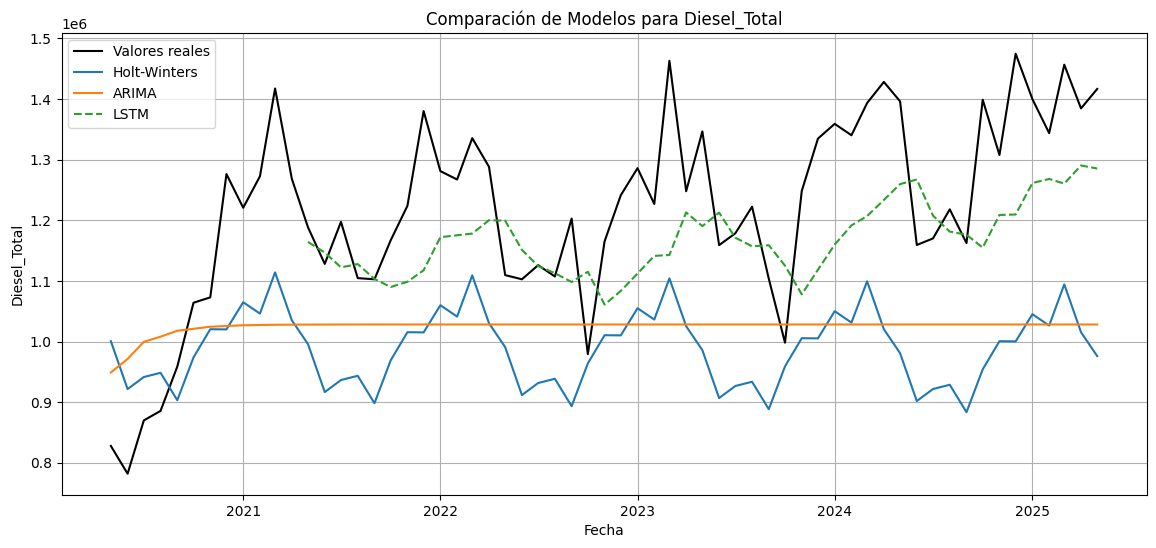

(2020-05-01    1.000671e+06
 2020-06-01    9.216228e+05
 2020-07-01    9.415179e+05
 2020-08-01    9.484968e+05
 2020-09-01    9.032611e+05
                   ...     
 2025-01-01    1.045118e+06
 2025-02-01    1.026405e+06
 2025-03-01    1.094367e+06
 2025-04-01    1.015439e+06
 2025-05-01    9.759955e+05
 Freq: MS, Length: 61, dtype: float64,
 2020-05-01    9.490527e+05
 2020-06-01    9.713814e+05
 2020-07-01    9.994832e+05
 2020-08-01    1.008108e+06
 2020-09-01    1.017796e+06
                   ...     
 2025-01-01    1.028181e+06
 2025-02-01    1.028181e+06
 2025-03-01    1.028181e+06
 2025-04-01    1.028181e+06
 2025-05-01    1.028181e+06
 Freq: MS, Name: predicted_mean, Length: 61, dtype: float64,
 array([[1164325.1],
        [1146805. ],
        [1122302.8],
        [1127778.1],
        [1103272. ],
        [1089959.1],
        [1098558.4],
        [1117565.1],
        [1172098.4],
        [1175254.9],
        [1178079.9],
        [1200110.1],
        [1199294.2],
        [11

In [53]:
# Comparacion de los modelos con la serie de Diesel
comparar_modelos_serie(consumo_diesel, 'Fecha', 'Diesel_Total', freq='MS')

En el caso del consumo de diésel, el modelo LSTM vuelve ser el más preciso, con un RMSE de 144,743 y un MAE de 119,478, lo que muestra una mejora significativa respecto a Holt-Winters (RMSE = 263,487) y ARIMA (RMSE = 244,184). En la gráfica se observa que LSTM logra capturar las tendencias del diésel bastante bien, mientras que Holt-Winters suaviza demasiado los datos y ARIMA sigue con su linea recta.

